<a href="https://colab.research.google.com/github/analaurdzalba/Seq2Seq-Translation-AR21359/blob/main/Assignment1_DSDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.util import ngrams

In [ ]:
df = pd.read_json("train_spider.json")
df.head(25)


,db_id,query,query_toks,query_toks_no_value,question,question_toks,sql
0,department_management,SELECT count(*) FROM head WHERE age > 56,"[SELECT, count, (, *, ), FROM, head, WHERE, ag...","[select, count, (, *, ), from, head, where, ag...",How many heads of the departments are older th...,"[How, many, heads, of, the, departments, are, ...","{'from': {'table_units': [['table_unit', 1]], ..."
1,department_management,"SELECT name , born_state , age FROM head ORD...","[SELECT, name, ,, born_state, ,, age, FROM, he...","[select, name, ,, born_state, ,, age, from, he...","List the name, born state and age of the heads...","[List, the, name, ,, born, state, and, age, of...","{'from': {'table_units': [['table_unit', 1]], ..."
2,department_management,"SELECT creation , name , budget_in_billions ...","[SELECT, creation, ,, name, ,, budget_in_billi...","[select, creation, ,, name, ,, budget_in_billi...","List the creation year, name and budget of eac...","[List, the, creation, year, ,, name, and, budg...","{'from': {'table_units': [['table_unit', 0]], ..."
3,department_management,"SELECT max(budget_in_billions) , min(budget_i...","[SELECT, max, (, budget_in_billions, ), ,, min...","[select, max, (, budget_in_billions, ), ,, min...",What are the maximum and minimum budget of the...,"[What, are, the, maximum, and, minimum, budget...","{'from': {'table_units': [['table_unit', 0]], ..."
4,department_management,SELECT avg(num_employees) FROM department WHER...,"[SELECT, avg, (, num_employees, ), FROM, depar...","[select, avg, (, num_employees, ), from, depar...",What is the average number of employees of the...,"[What, is, the, average, number, of, employees...","{'from': {'table_units': [['table_unit', 0]], ..."
5,department_management,SELECT name FROM head WHERE born_state != 'Cal...,"[SELECT, name, FROM, head, WHERE, born_state, ...","[select, name, from, head, where, born_state, ...",What are the names of the heads who are born o...,"[What, are, the, names, of, the, heads, who, a...","{'from': {'table_units': [['table_unit', 1]], ..."
6,department_management,SELECT DISTINCT T1.creation FROM department AS...,"[SELECT, DISTINCT, T1.creation, FROM, departme...","[select, distinct, t1, ., creation, from, depa...",What are the distinct creation years of the de...,"[What, are, the, distinct, creation, years, of...","{'from': {'table_units': [['table_unit', 0], [..."
7,department_management,SELECT born_state FROM head GROUP BY born_stat...,"[SELECT, born_state, FROM, head, GROUP, BY, bo...","[select, born_state, from, head, group, by, bo...",What are the names of the states where at leas...,"[What, are, the, names, of, the, states, where...","{'from': {'table_units': [['table_unit', 1]], ..."
8,department_management,SELECT creation FROM department GROUP BY creat...,"[SELECT, creation, FROM, department, GROUP, BY...","[select, creation, from, department, group, by...",In which year were most departments established?,"[In, which, year, were, most, departments, est...","{'from': {'table_units': [['table_unit', 0]], ..."
9,department_management,"SELECT T1.name , T1.num_employees FROM depart...","[SELECT, T1.name, ,, T1.num_employees, FROM, d...","[select, t1, ., name, ,, t1, ., num_employees,...",Show the name and number of employees for the ...,"[Show, the, name, and, number, of, employees, ...","{'from': {'table_units': [['table_unit', 0], [..."


In [ ]:
df['question'].head(25) #look into questions
#load data 

0     How many heads of the departments are older th...
1     List the name, born state and age of the heads...
2     List the creation year, name and budget of eac...
3     What are the maximum and minimum budget of the...
4     What is the average number of employees of the...
5     What are the names of the heads who are born o...
6     What are the distinct creation years of the de...
7     What are the names of the states where at leas...
8      In which year were most departments established?
9     Show the name and number of employees for the ...
10                  How many acting statuses are there?
11    How many departments are led by heads who are ...
12    What are the distinct ages of the heads who ar...
13    List the states where both the secretary of 'T...
14    Which department has more than 1 head at a tim...
15    Which head's name has the substring 'Ha'? List...
16                            How many farms are there?
17                           Count the number of

In [ ]:
df.info()
#get information of dataset to be used
#7000 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   db_id                7000 non-null   object
 1   query                7000 non-null   object
 2   query_toks           7000 non-null   object
 3   query_toks_no_value  7000 non-null   object
 4   question             7000 non-null   object
 5   question_toks        7000 non-null   object
 6   sql                  7000 non-null   object
dtypes: object(7)
memory usage: 382.9+ KB


In [ ]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense
#import libraries that will be used later on

In [ ]:
y = df['db_id'].unique()
y.shape
#verify quantity of unique id's in database to know which are unique

(140,)

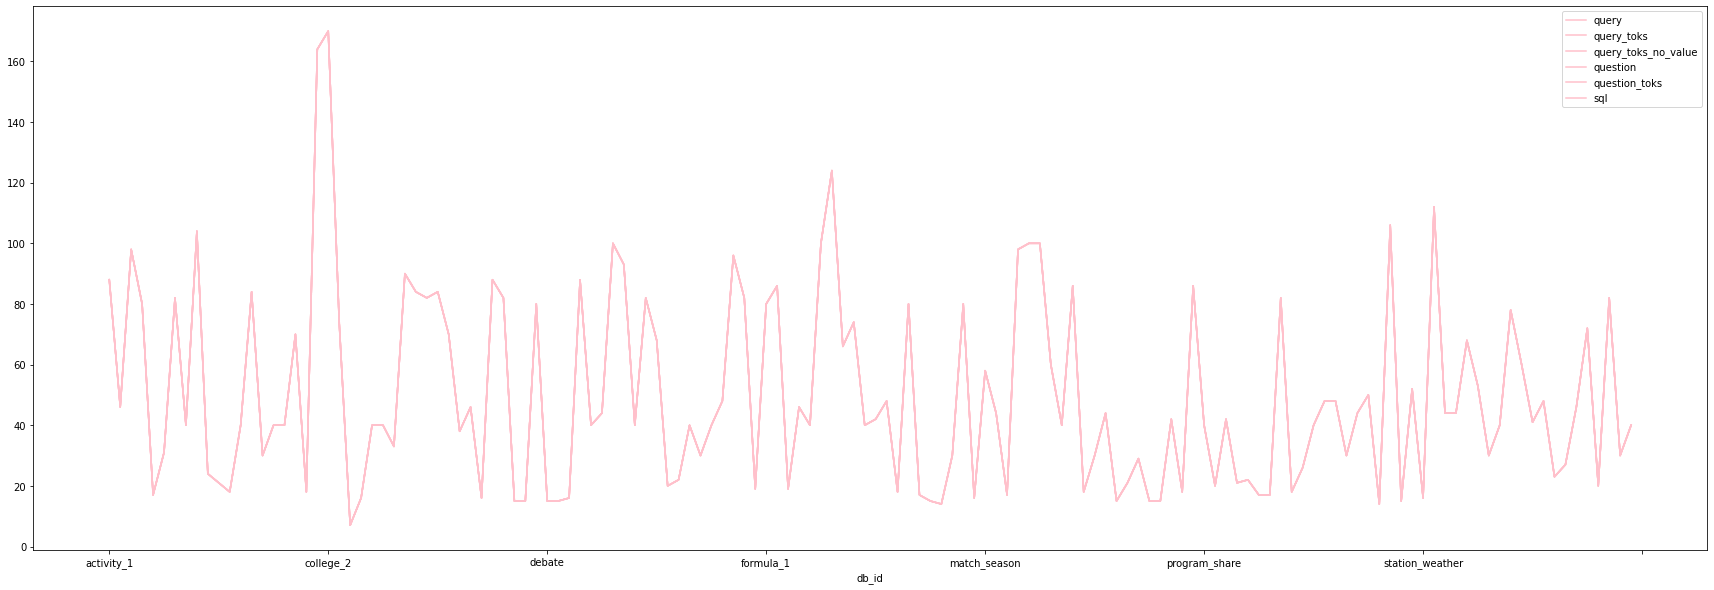

In [ ]:
df.groupby(['db_id']).count().plot(figsize = (30,10), color = 'pink')
#load data and graph to observe which id's have the most results in the database